<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.RwandaCO2Emissions/blob/main/1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [19]:
from google.colab import drive


# Datasets
import pandas as pd


# Numerics
import numpy as np


# Plotting
import matplotlib.pyplot as plt


# Preprocessing & pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Setup

In [20]:
# %%capture

GIT_DOWNLOAD_PATH = 'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'

FILES_LIST = [
    'path_manager.py',
    'sklearn_transformers.py',
    'sklearn_utils.py',
    'model.py'
]



GDRIVE_PATH = '/content/gdrive/MyDrive/'
PREPROC_TRIAL = 1
MODELS_TRIAL = 1
COMPETITION_PATH = GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/'

# --------------------------------------------------

try:
    from nbpep8.nbpep8 import pep8
except ModuleNotFoundError:
    !pip install pycodestyle
    !pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8

# ---------------------------------------

def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}


url_dict = {file: GIT_DOWNLOAD_PATH + file for file in FILES_LIST}
print('a')
download_files(url_dict)

# ---------------------------------------

import importlib
import path_manager
import sklearn_utils
import sklearn_transformers
import model

def reload_all(modules_list_):
    for module in modules_list_:
        importlib.reload(module)

MODULES_LIST = [
    path_manager,
    sklearn_utils,
    sklearn_transformers,
    model
]
reload_all(MODULES_LIST)

# ---------------------------------------

from path_manager import PathManager
from model import Model

from sklearn_utils import nan_statistics
from sklearn_utils import boxplot_regression
from sklearn_utils import get_correlated_attributes
from sklearn_utils import visualize_datasets_distributions

from sklearn_transformers import ColumnDropper
from sklearn_transformers import LogTransformer

# ---------------------------------------

from google.colab import drive
drive.mount('/content/gdrive')

manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)
manager.setup_paths()

a
--2023-09-24 09:54:19--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/path_manager.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3482 (3.4K) [text/plain]
Saving to: ‘path_manager.py’

path_manager.py     100%[===================>]   3.40K  --.-KB/s    in 0s      

2023-09-24 09:54:19 (54.5 MB/s) - ‘path_manager.py’ saved [3482/3482]

--2023-09-24 09:54:19--  http://path_manager.py/
Resolving path_manager.py (path_manager.py)... failed: Name or service not known.
wget: unable to resolve host address ‘path_manager.py’
FINISHED --2023-09-24 09:54:19--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.4K in 0s (54.5 MB/s)
--2023-09-24 09:54:19--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/sklearn_transformers.py
Re

# Read the data

In [21]:
df = pd.read_csv(manager.train_path)

In [22]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# Data exploration

In [49]:
# We explore only the training part (or trainval part)
# Use the same seed, when splitting the data

TRAINVAL_SIZE = 0.8
RANDOM_SEED = 42

df_trainval, df_test = train_test_split(
    df,
    train_size = TRAINVAL_SIZE,
    random_state=RANDOM_SEED
)

df_trainval.shape, df_test.shape

((63218, 76), (15805, 76))

Trainval set is too large -> let us sample a stratified exploration set

In [50]:
EXPLORATION_SIZE = 0.03

df_exploration, _ = train_test_split(
    df_trainval,
    train_size = EXPLORATION_SIZE,
    random_state = RANDOM_SEED
)

df_exploration.shape

(1896, 76)

## Nan statistics

In [51]:
from sklearn_utils import nan_report

_ = nan_report(df_exploration, threshold=0.18)

28 / 76 cols (37.0 %) have nan % > 0.18

SulphurDioxide_SO2_column_number_density                   0.184072
SulphurDioxide_SO2_column_number_density_amf               0.184072
SulphurDioxide_SO2_slant_column_number_density             0.184072
SulphurDioxide_cloud_fraction                              0.184072
SulphurDioxide_sensor_azimuth_angle                        0.184072
SulphurDioxide_sensor_zenith_angle                         0.184072
SulphurDioxide_solar_azimuth_angle                         0.184072
SulphurDioxide_solar_zenith_angle                          0.184072
SulphurDioxide_SO2_column_number_density_15km              0.184072
NitrogenDioxide_NO2_column_number_density                  0.235232
NitrogenDioxide_tropospheric_NO2_column_number_density     0.235232
NitrogenDioxide_stratospheric_NO2_column_number_density    0.235232
NitrogenDioxide_NO2_slant_column_number_density            0.235232
NitrogenDioxide_tropopause_pressure                        0.235232
Nitroge

<Axes: >

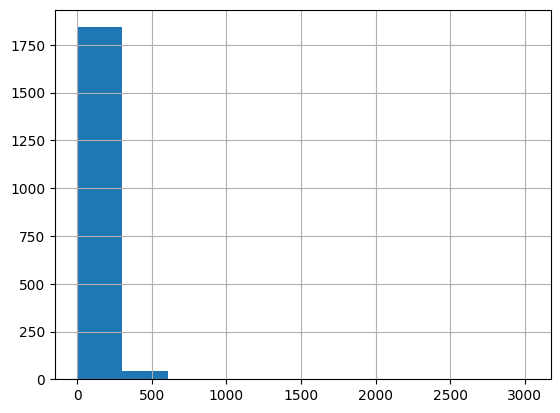

In [52]:
df_exploration['emission'].hist()

## Outlier analysis

### Outliers in target

<Axes: >

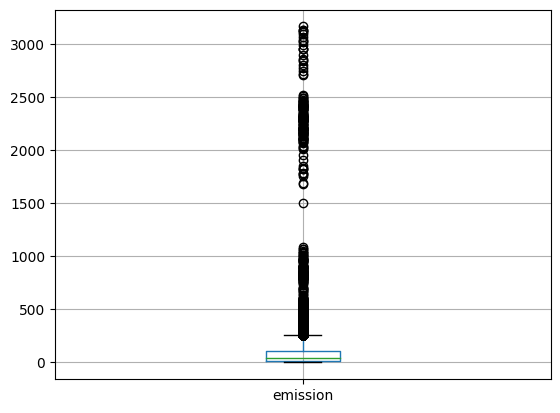

In [26]:
df_trainval[['emission']].boxplot()

In [27]:
df_trainval['emission'].describe()

count    63218.000000
mean        82.392697
std        148.033172
min          0.000000
25%          9.776888
50%         45.649794
75%        109.509563
max       3167.768000
Name: emission, dtype: float64

3025.0217


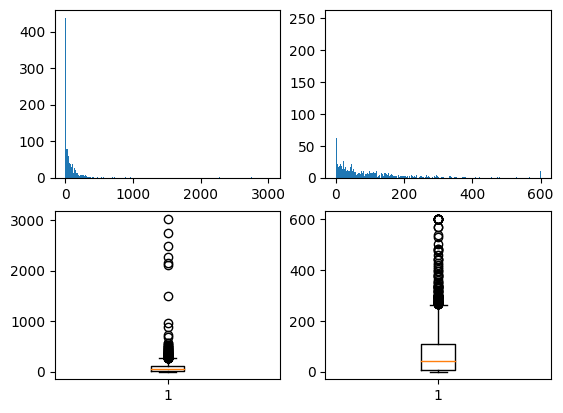

In [53]:
emission = np.array(df_exploration['emission'].values)
print(emission.max())
fig, ax = plt.subplots(2, 2)

BINS = 500
CAP_VALUE = 600
_ = ax[0][0].hist(emission, bins=BINS)
_ = ax[1][0].boxplot(emission)

# capping
emission[emission >= CAP_VALUE] = CAP_VALUE

_ = ax[0][1].hist(emission, bins=BINS)
_ = ax[1][1].boxplot(emission)

## Profile report

In [106]:
%%capture
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [107]:
df_exploration.shape

(1896, 76)

In [108]:
from pandas_profiling import ProfileReport

report = ProfileReport(df_exploration)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

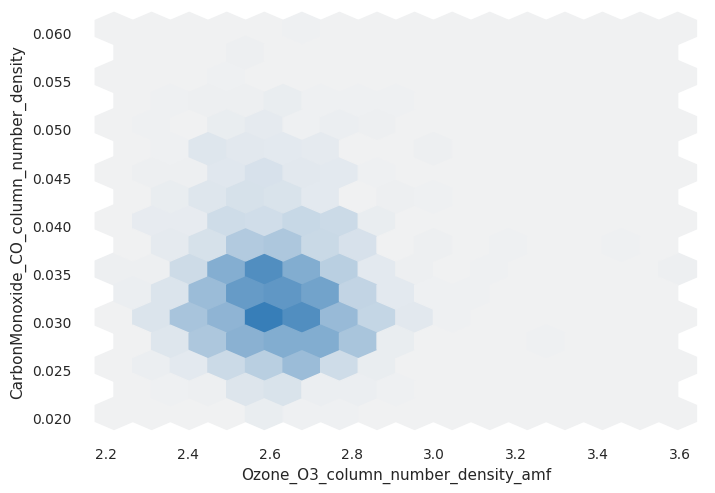

In [109]:
report.to_notebook_iframe()

## Feature distribution

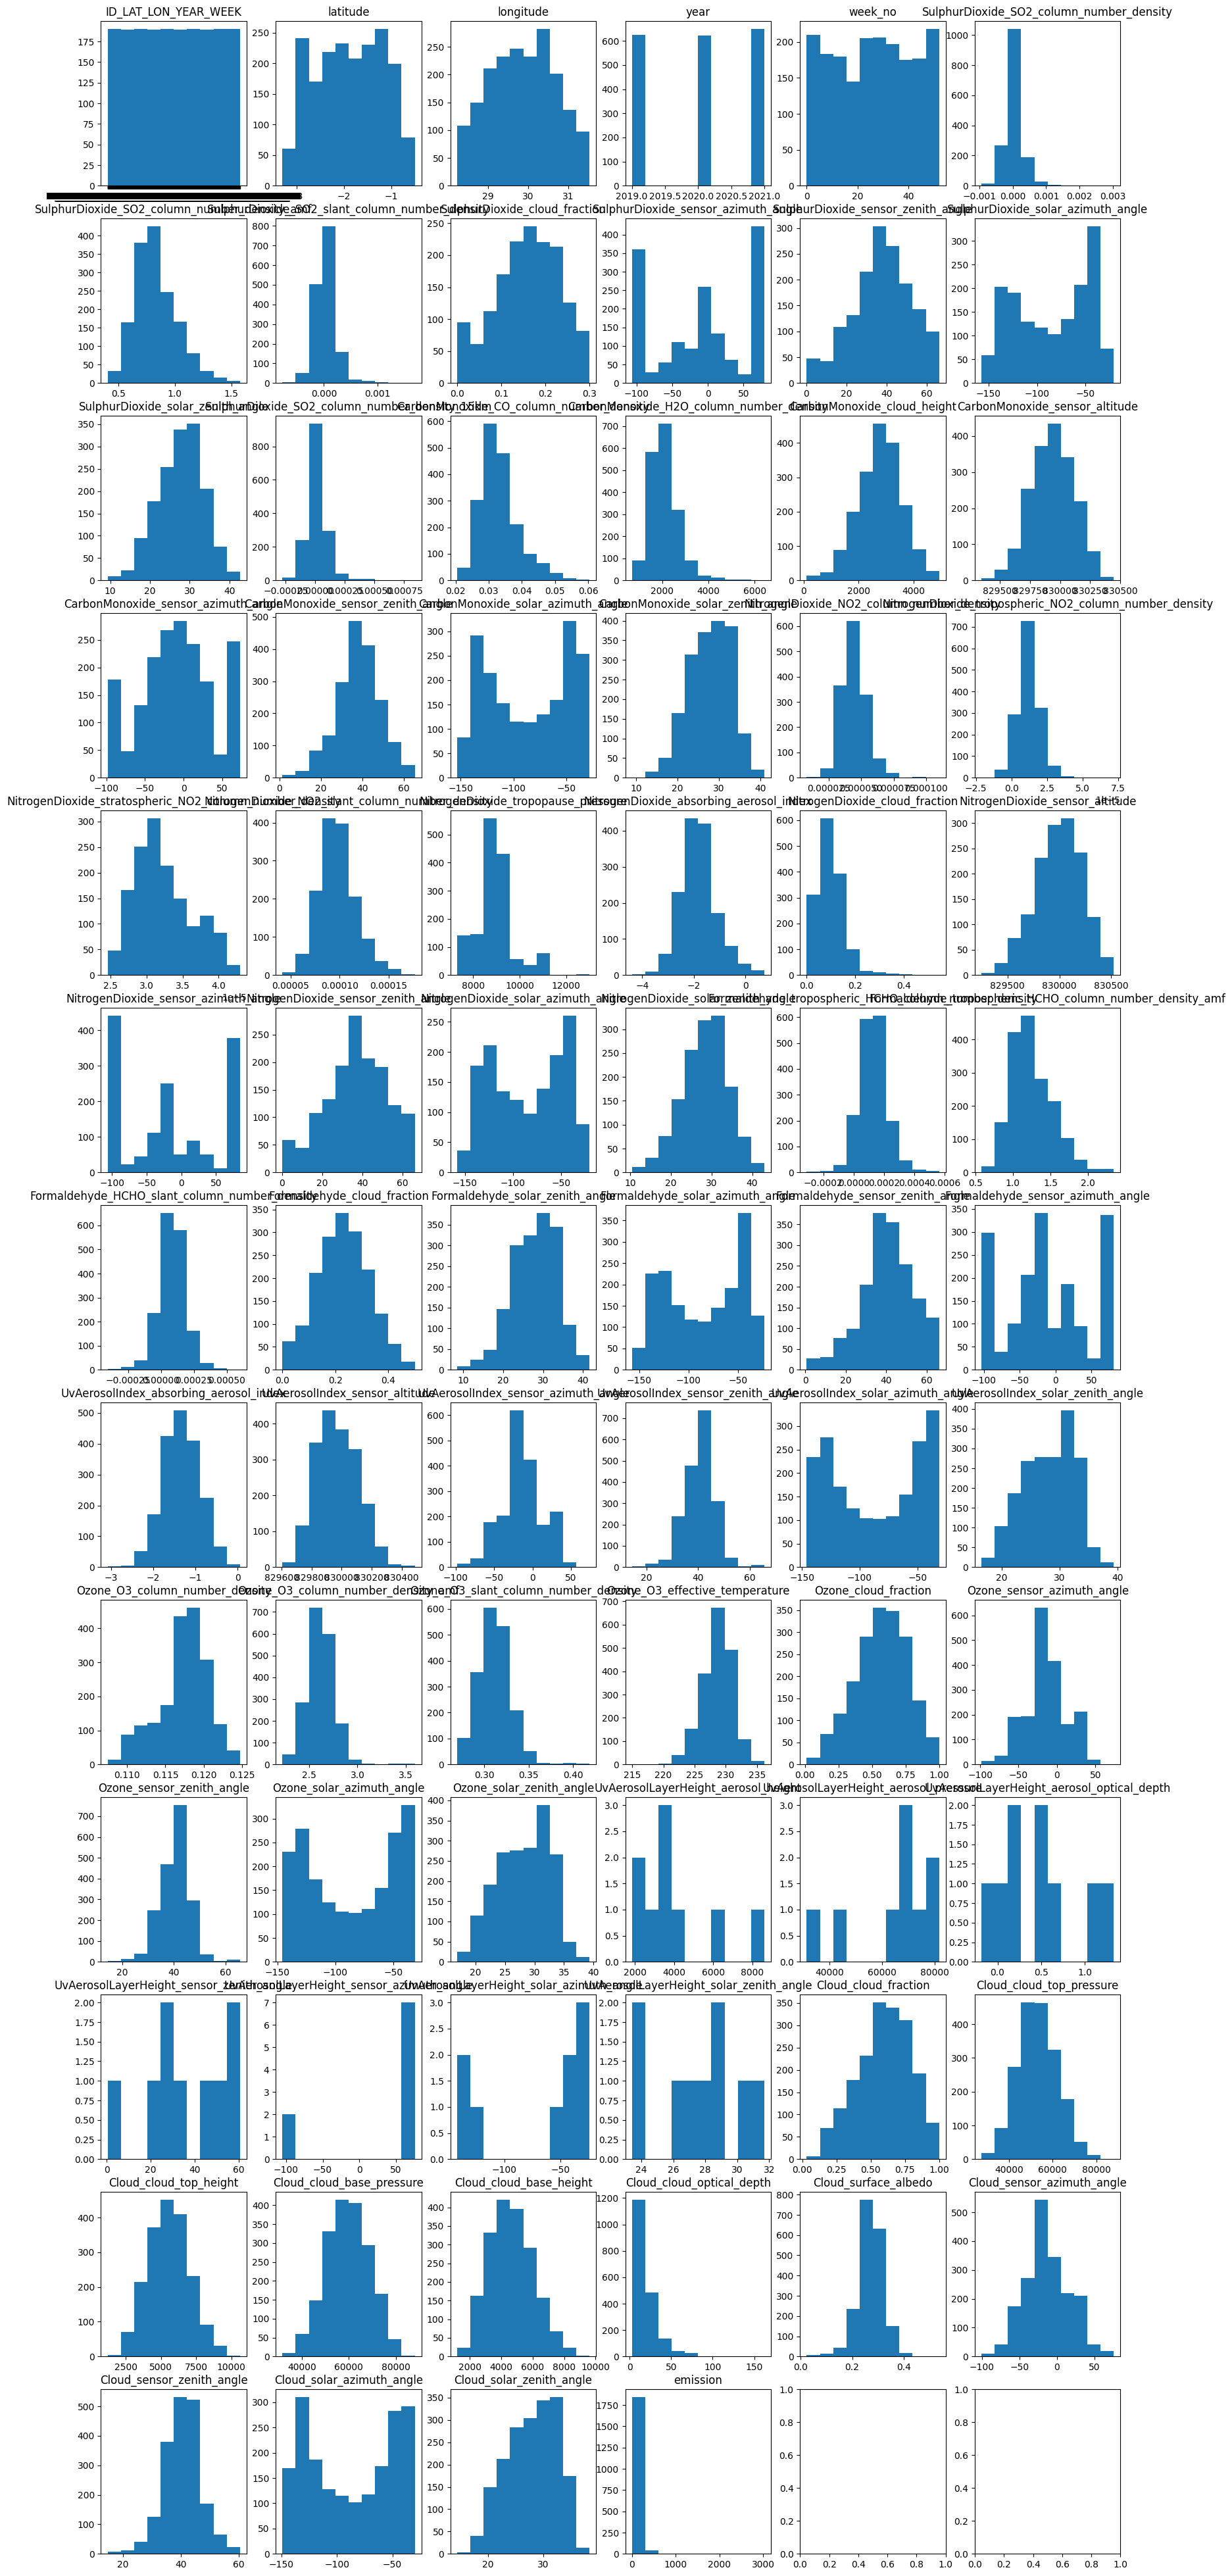

In [65]:
def report_feature_histograms(df, n_cols, figsize=(20, 50), hist_params={}):
    n_features = df.shape[1]
    temp = n_features // n_cols
    n_rows = temp if n_features % n_cols == 0 else temp + 1

    _, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
    ax = ax.flatten()

    for i, col in enumerate(df.columns.to_list()):
        _ = ax[i].hist(df[col], **hist_params)
        ax[i].set_title(col)

report_feature_histograms(df_exploration, 6)

Text(0, 0.5, 'Sum of emissions')

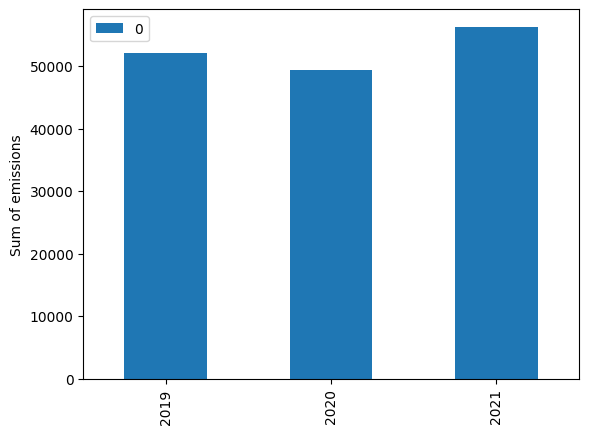

In [87]:
subset = df_exploration.loc[:, ['year', 'emission']]
sum_emission = {
    year: [df_exploration.loc[df_exploration['year'] == year, 'emission'].sum()]
    for year in sorted(df_exploration['year'].unique())
}
ax = pd.DataFrame(sum_emission).T.plot(kind='bar')
ax.set_ylabel('Sum of emissions')

0 52


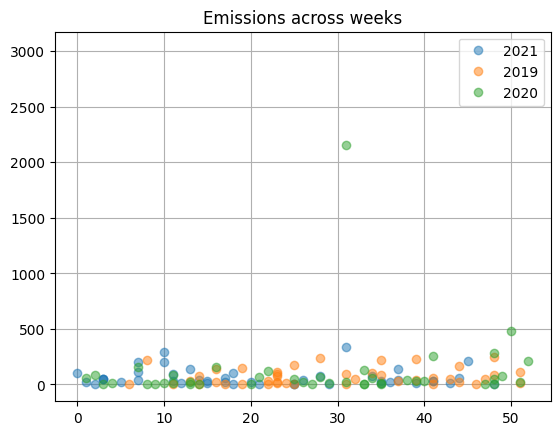

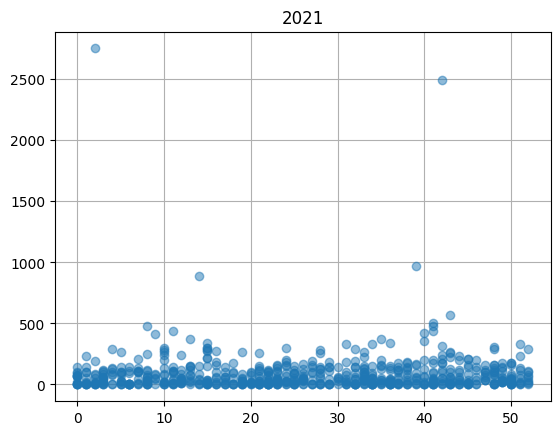

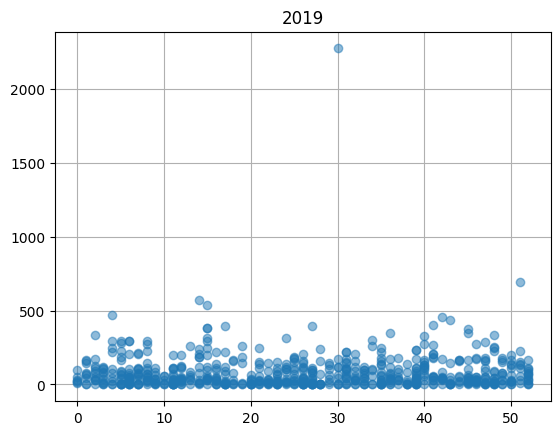

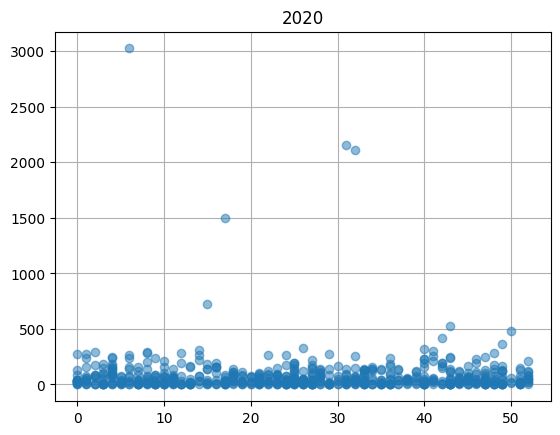

In [105]:
print(df_exploration.week_no.min(), df_exploration['week_no'].max())
df_exploration.head()

_, ax = plt.subplots()
ax.set_title('Emissions across weeks')
ax.grid()

for year in df_exploration['year'].unique():
    subset = df_exploration.loc[
        df_exploration['year'] == year,
        ['emission', 'week_no']
    ]
    x = subset['week_no']
    y = subset['emission']
    ax.plot(
        x, y, markevery=15, linewidth=0, marker='o', alpha=0.5, label=year
    )
    _, ax_separate = plt.subplots()
    ax_separate.plot(x, y, linewidth=0, marker='o', alpha=0.5, label=year)
    ax_separate.set_title(year)
    ax_separate.grid()

ax.legend()

## Feature engineering

### Season

In [119]:
df_exploration.week_no

16679    37
52738     3
42418    18
72541    37
6791      7
         ..
21949     7
38302    36
25326    45
34646    37
5544     32
Name: week_no, Length: 1896, dtype: int64

In [123]:
def week_to_season(week):
    d = {
        'winter': [0, 12],
        'spring': [13, 25],
        'summer': [26, 38],
        'autumn': [39, 52]
    }
    for season, weeks in d.items():
        # print(weeks)
        if weeks[0] <= week <= weeks[1]:
            return season
    raise Exception

df_exploration['season'] = df_exploration['week_no'].map(week_to_season)
df_exploration.head(5)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,month,season
16679,ID_-1.211_30.389_2021_37,-1.211,30.389,2021,37,0.000690,0.670317,0.000463,0.123841,72.598143,...,4293.883870,14.173383,0.211745,-34.943720,31.223612,-79.644265,25.191064,139.117200,None,summer
52738,ID_-2.269_30.231_2021_03,-2.269,30.231,2021,3,0.000022,1.199537,0.000027,0.259767,74.578848,...,4279.982712,18.986531,0.224700,-0.665074,45.859787,-138.331967,25.962014,112.908516,None,winter
42418,ID_-1.945_29.155_2021_18,-1.945,29.155,2021,18,-0.000055,0.950502,-0.000066,0.245811,74.909393,...,4615.836790,8.058593,0.325476,25.006302,36.506994,-47.835345,28.492142,177.737660,None,spring
72541,ID_-2.883_29.017_2019_37,-2.883,29.017,2019,37,-0.000275,0.992247,-0.000273,0.233065,75.962624,...,3827.928626,21.139118,0.287782,-12.130850,50.918334,-79.693418,26.525865,28.183731,None,summer
6791,ID_-0.950_31.450_2021_07,-0.950,31.450,2021,7,NaN,NaN,NaN,NaN,NaN,...,8113.168652,15.616784,0.277444,-34.738083,41.904405,-122.356633,22.951724,1.823893,None,winter


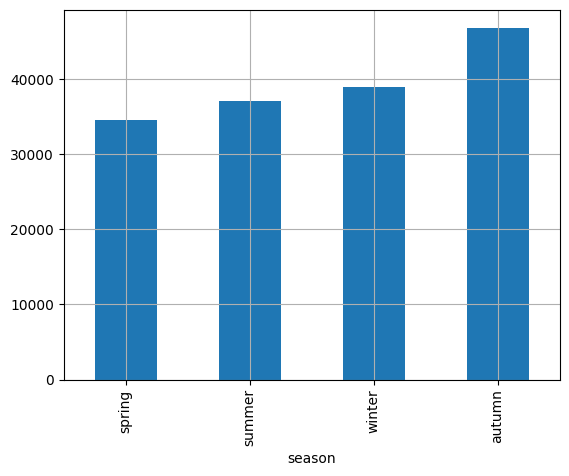

In [130]:
df_exploration \
    .groupby('season')['emission'] \
    .sum() \
    .sort_values() \
    .plot(kind='bar') \
    .grid()

In [134]:
df_exploration.groupby('season')['emission'].aggregate([np.sum, 'max', 'min'])

,sum,max,min
season,,,
autumn,46866.133841,2496.3787,0.0
spring,34604.973090,1502.6677,0.0
summer,37143.968501,2275.6047,0.0
winter,38951.238123,3025.0217,0.0


### Month of a year (unfinished)

In [113]:
df['week_no'].value_counts().sort_index()

0     1491
1     1491
2     1491
3     1491
4     1491
5     1491
6     1491
7     1491
8     1491
9     1491
10    1491
11    1491
12    1491
13    1491
14    1491
15    1491
16    1491
17    1491
18    1491
19    1491
20    1491
21    1491
22    1491
23    1491
24    1491
25    1491
26    1491
27    1491
28    1491
29    1491
30    1491
31    1491
32    1491
33    1491
34    1491
35    1491
36    1491
37    1491
38    1491
39    1491
40    1491
41    1491
42    1491
43    1491
44    1491
45    1491
46    1491
47    1491
48    1491
49    1491
50    1491
51    1491
52    1491
Name: week_no, dtype: int64

In [117]:
# def week_to_month(year, week):

#     dictionary = {
#         '2019': {
#             'January': [0, 1, 2, 3],
#             'February': [4, 5, 6, 7],
#             'March': [8, 9, 10, 11],
#             'April': [12, 13, 14, 15],
#             'May': [16, 17, 18, 19],
#             'June': [20, 21, 22, 23],
#             'July': [24, 25, 26, 27],
#             'August': [28, 29, 30, 31],
#             'September': [32, 33, 34, 35],
#             'October': [36, 37, 38, 39],
#             'November': [40, 41, 42, 43],
#             'December': [44, 45, 46, 47],
#         },
#         '2020': {
#             'January': [0, 1, 2, 3],
#             'February': [4, 5, 6, 7],
#             'March': [8, 9, 10, 11],
#             'April': [12, 13, 14, 15],
#             'May': [16, 17, 18, 19],
#             'June': [20, 21, 22, 23],
#             'July': [24, 25, 26, 27],
#             'August': [28, 29, 30, 31],
#             'September': [32, 33, 34, 35],
#             'October': [36, 37, 38, 39],
#             'November': [40, 41, 42, 43],
#             'December': [44, 45, 46, 47],
#         },
#         '2021': {
#             'January': [0, 1, 2, 3],
#             'February': [4, 5, 6, 7],
#             'March': [8, 9, 10, 11],
#             'April': [12, 13, 14, 15],
#             'May': [16, 17, 18, 19],
#             'June': [20, 21, 22, 23],
#             'July': [24, 25, 26, 27],
#             'August': [28, 29, 30, 31],
#             'September': [32, 33, 34, 35],
#             'October': [36, 37, 38, 39],
#             'November': [40, 41, 42, 43],
#             'December': [44, 45, 46, 47],
#         }

#     }


#     for k, v in dictionary.items():
#         print(v, week_n, week_n in v)
#         if week_n in v:
#             return k
#     raise Exception

# df_exploration['month'] = df.apply(lambda item: week_to_month(year=item['year'], week=item['weei_no']))

0
[48, 49, 50, 51, 52] 0 False
[4, 5, 6, 7] 0 False
[8, 9, 10, 11] 0 False
[12, 13, 14, 15] 0 False
[16, 17, 18, 19] 0 False
[20, 21, 22, 23] 0 False
[24, 25, 26, 27] 0 False
[28, 29, 30, 31] 0 False
[32, 33, 34, 35] 0 False
[36, 37, 38, 39] 0 False
[40, 41, 42, 43] 0 False
[44, 45, 46, 47] 0 False


Exception: ignored

### Binning for lattitude and longitude

In [136]:
df_exploration.head()
df_exploration[['latitude', 'longitude']].describe()

,latitude,longitude
count,1896.000000,1896.000000
mean,-1.886077,29.863659
std,0.699973,0.808132
min,-3.299000,28.228000
25%,-2.451000,29.230000
50%,-1.882000,29.883000
75%,-1.283000,30.471000
max,-0.510000,31.532000


Text(0.5, 1.0, 'longitude')

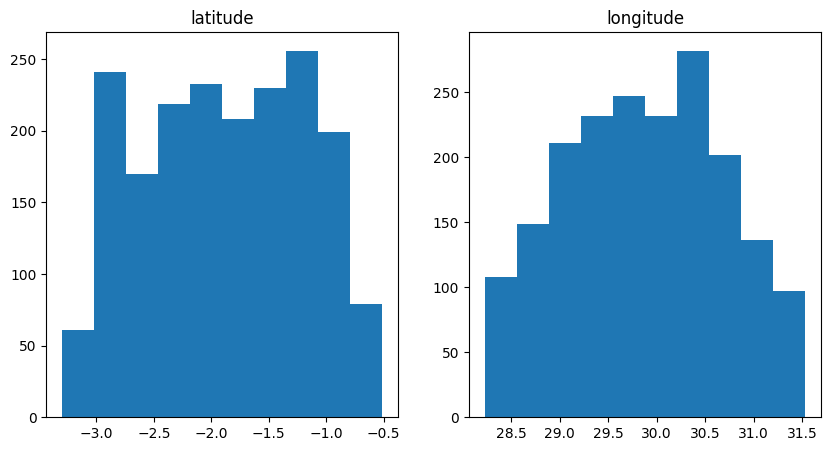

In [141]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].hist(df_exploration['latitude'])
ax[0].set_title('latitude')

_ = ax[1].hist(df_exploration['longitude'])
ax[1].set_title('longitude')

In [142]:
np.arange(3)

array([0, 1, 2])

In [155]:
def bin_column(df, column_name, bins, to_plot=True):
    labels = np.arange(len(bins) - 1)

    _, ax = plt.subplots()
    ax.hist(df[column_name])
    for bin in bins:
        ax.axvline(bin, linestyle='--', color='white')
    ax.set_title(column_name)

    df[f'{column_name}_binned'] = pd.cut(
        df[column_name],
        bins=bins,
        labels=labels
    )

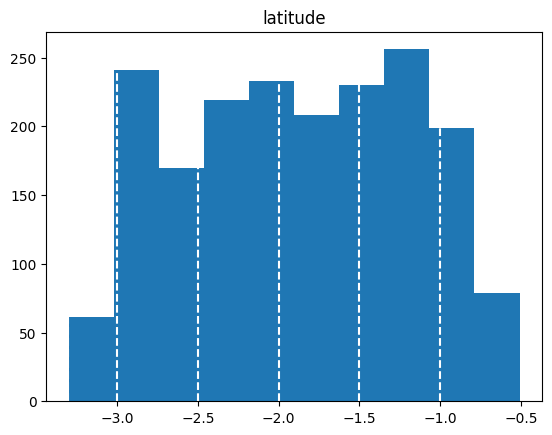

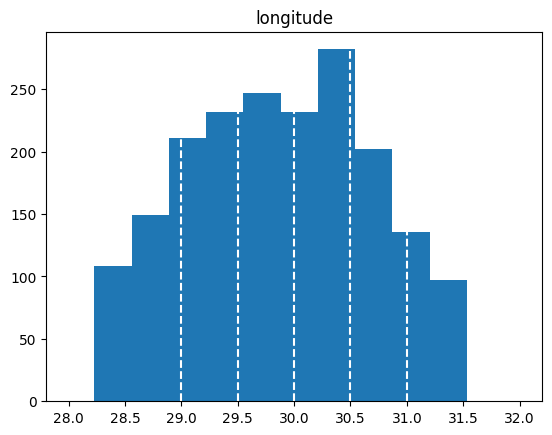

In [159]:
bin_column(
    df_exploration,
    'latitude',
    [-3.3, -3.0, -2.5, -2.0, -1.5, -1.0, -0.4]
)

bin_column(
    df_exploration,
    'longitude',
    [28, 29.0, 29.5, 30, 30.5, 31, 32]
)

In [162]:
df_exploration['latitude_binned'] \
    .value_counts() \
    .sort_index()

0     69
1    384
2    385
3    417
4    425
5    216
Name: latitude_binned, dtype: int64

In [163]:
df_exploration['longitude_binned'] \
    .value_counts() \
    .sort_index()

0    322
1    361
2    389
3    374
4    319
5    131
Name: longitude_binned, dtype: int64

In [168]:
import tensorflow as tf

def get_quantile_based_boundaries(feature_values, num_buckets):
    boundaries = np.arange(1.0, num_buckets) / num_buckets
    quantiles = feature_values.quantile(boundaries)
    return [quantiles[q] for q in quantiles.keys()]


latitudes = tf.feature_column.numeric_column('latitude')
bucketized_latitude = tf.feature_column.bucketized_column(
    latitudes,
    boundaries=get_quantile_based_boundaries(
        df_exploration['latitude'], 5
    )
)

In [167]:
latitudes

NumericColumn(key='latitudes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

# Notes

- Remove columns with >18% outliers
- Clean outliers in target feature (or cap them to 600)
- Remove categorical column
- Feature Engineering - add months column
- Binning for lattitude and longitude
- For Year column - turn into ordinal categorical (1, 2, 3 for 2019, 2020, 2021). It can learn, that the amount of emissions grows with each year
- Feature engineering - season column
